In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r"C:\Users\LENOVO\Desktop\sales_and_revenue.csv")

In [3]:
df.head()

,Transaction_id,Date,Time,Quantity,Store_id,Location,Product_id,Unit_price,Product,Category,Product_detail,Total sales
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2


In [4]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [5]:
df['Month'] = df['Date'].dt.to_period('M')
df.head()

,Transaction_id,Date,Time,Quantity,Store_id,Location,Product_id,Unit_price,Product,Category,Product_detail,Total sales,Month
0,1,2023-01-01,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01
1,2,2023-01-01,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01
2,3,2023-01-01,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01
3,4,2023-01-01,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01
4,5,2023-01-01,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01


In [6]:
total_revenue = df['Total sales'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 698812.3300000001


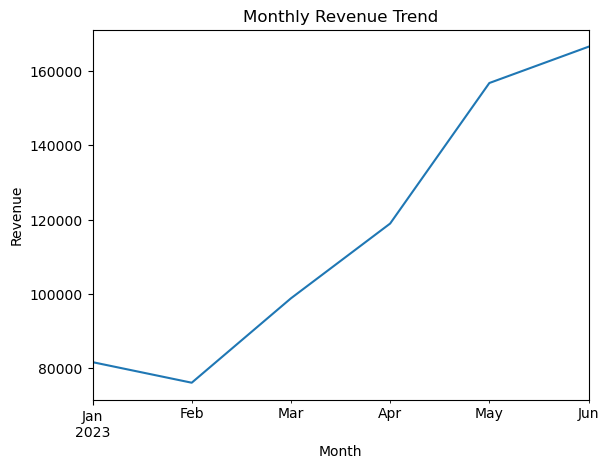

In [7]:
monthly_revenue = df.groupby('Month')['Total sales'].sum()

monthly_revenue.plot(kind='line', title='Monthly Revenue Trend')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [8]:
top_products = (
    df.groupby('Product')['Total sales']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(top_products)

Product
Coffee                269952.45
Tea                   196405.95
Bakery                 82315.64
Drinking Chocolate     72416.00
Coffee beans           40085.25
Branded                13607.00
Loose Tea              11213.60
Flavours                8408.80
Packaged Chocolate      4407.64
Name: Total sales, dtype: float64


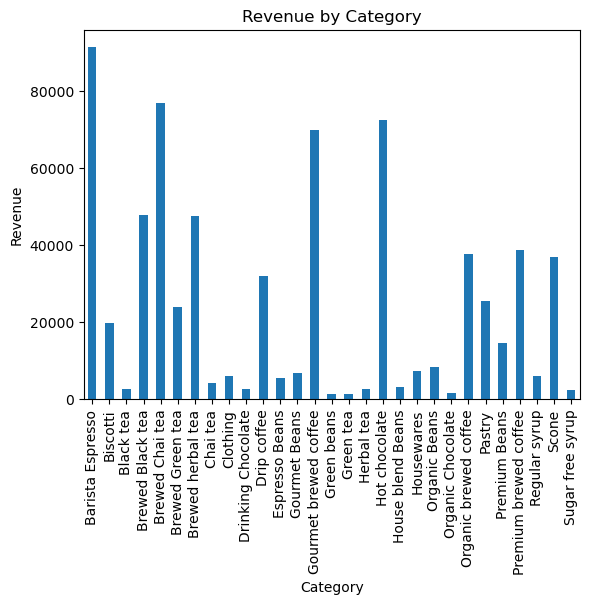

In [9]:
category_revenue = df.groupby('Category')['Total sales'].sum()

category_revenue.plot(kind='bar', title='Revenue by Category')
plt.xlabel("Category")
plt.ylabel("Revenue")
plt.show()

In [10]:
location_revenue = df.groupby('Location')['Total sales'].sum().sort_values(ascending=False)
print(location_revenue)

Location
Hell's Kitchen     236511.17
Astoria            232243.91
Lower Manhattan    230057.25
Name: Total sales, dtype: float64


In [11]:
df.to_csv("coffee_shop_sales_cleaned.csv", index=False)